# XGBoost Model in Python with sklearn 
[source](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

This tutorial is broken down into the following 6 sections:

* Install XGBoost for use with Python.
* Problem definition and download dataset.
* Load and prepare data.
* Train XGBoost model.
* Make predictions and evaluate model.
* Tie it all together and run the example.

In [1]:
!pip install pandas-summary

In [2]:
!pip install kaggle

# Install XGBoost

In [3]:
!pip install xgboost
!pip install --upgrade xgboost

Requirement already up-to-date: xgboost in /home/ouzoh/anaconda3/lib/python3.6/site-packages (0.71)
Requirement not upgraded as not directly required: scipy in /home/ouzoh/anaconda3/lib/python3.6/site-packages (from xgboost) (1.0.0)
Requirement not upgraded as not directly required: numpy in /home/ouzoh/anaconda3/lib/python3.6/site-packages (from xgboost) (1.14.0)


# Problem Definition

This dataset is comprised of 8 input variables that describe medical details of patients
and one output variable to indicate whether the patient will have an onset of diabetes within 5 years.

In [4]:
# Download Data

In [5]:
# !wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

In [6]:
# !kaggle datasets download -o -d uciml/pima-indians-diabetes-database .

usage: kaggle [-h] {competitions,datasets,config} ...
kaggle: error: unrecognized arguments: .


In [7]:
cp /home/ouzoh/.kaggle/datasets/uciml/pima-indians-diabetes-database/*.zip .

In [8]:
!unzip pima-indians-diabetes-database.zip & rm pima-indians-diabetes-database.zip

# Load and Prepare data

In [9]:
# import library

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
import pandas as pd
from pandas_summary import DataFrameSummary
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [11]:
df = pd.read_csv("diabetes.csv")

In [12]:
dfs = DataFrameSummary(df)

In [13]:
dfs.columns_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
counts,768,768,768,768,768,768,768,768,768
uniques,17,136,47,51,186,248,517,52,2
missing,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool


In [14]:
dfs.summary()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
mean,3.84505,120.895,69.1055,20.5365,79.7995,31.9926,0.471876,33.2409,0.348958
std,3.36958,31.9726,19.3558,15.9522,115.244,7.88416,0.331329,11.7602,0.476951
min,0,0,0,0,0,0,0.078,21,0
25%,1,99,62,0,0,27.3,0.24375,24,0
50%,3,117,72,23,30.5,32,0.3725,29,0
75%,6,140.25,80,32,127.25,36.6,0.62625,41,1
max,17,199,122,99,846,67.1,2.42,81,1
counts,768,768,768,768,768,768,768,768,768
uniques,17,136,47,51,186,248,517,52,2


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


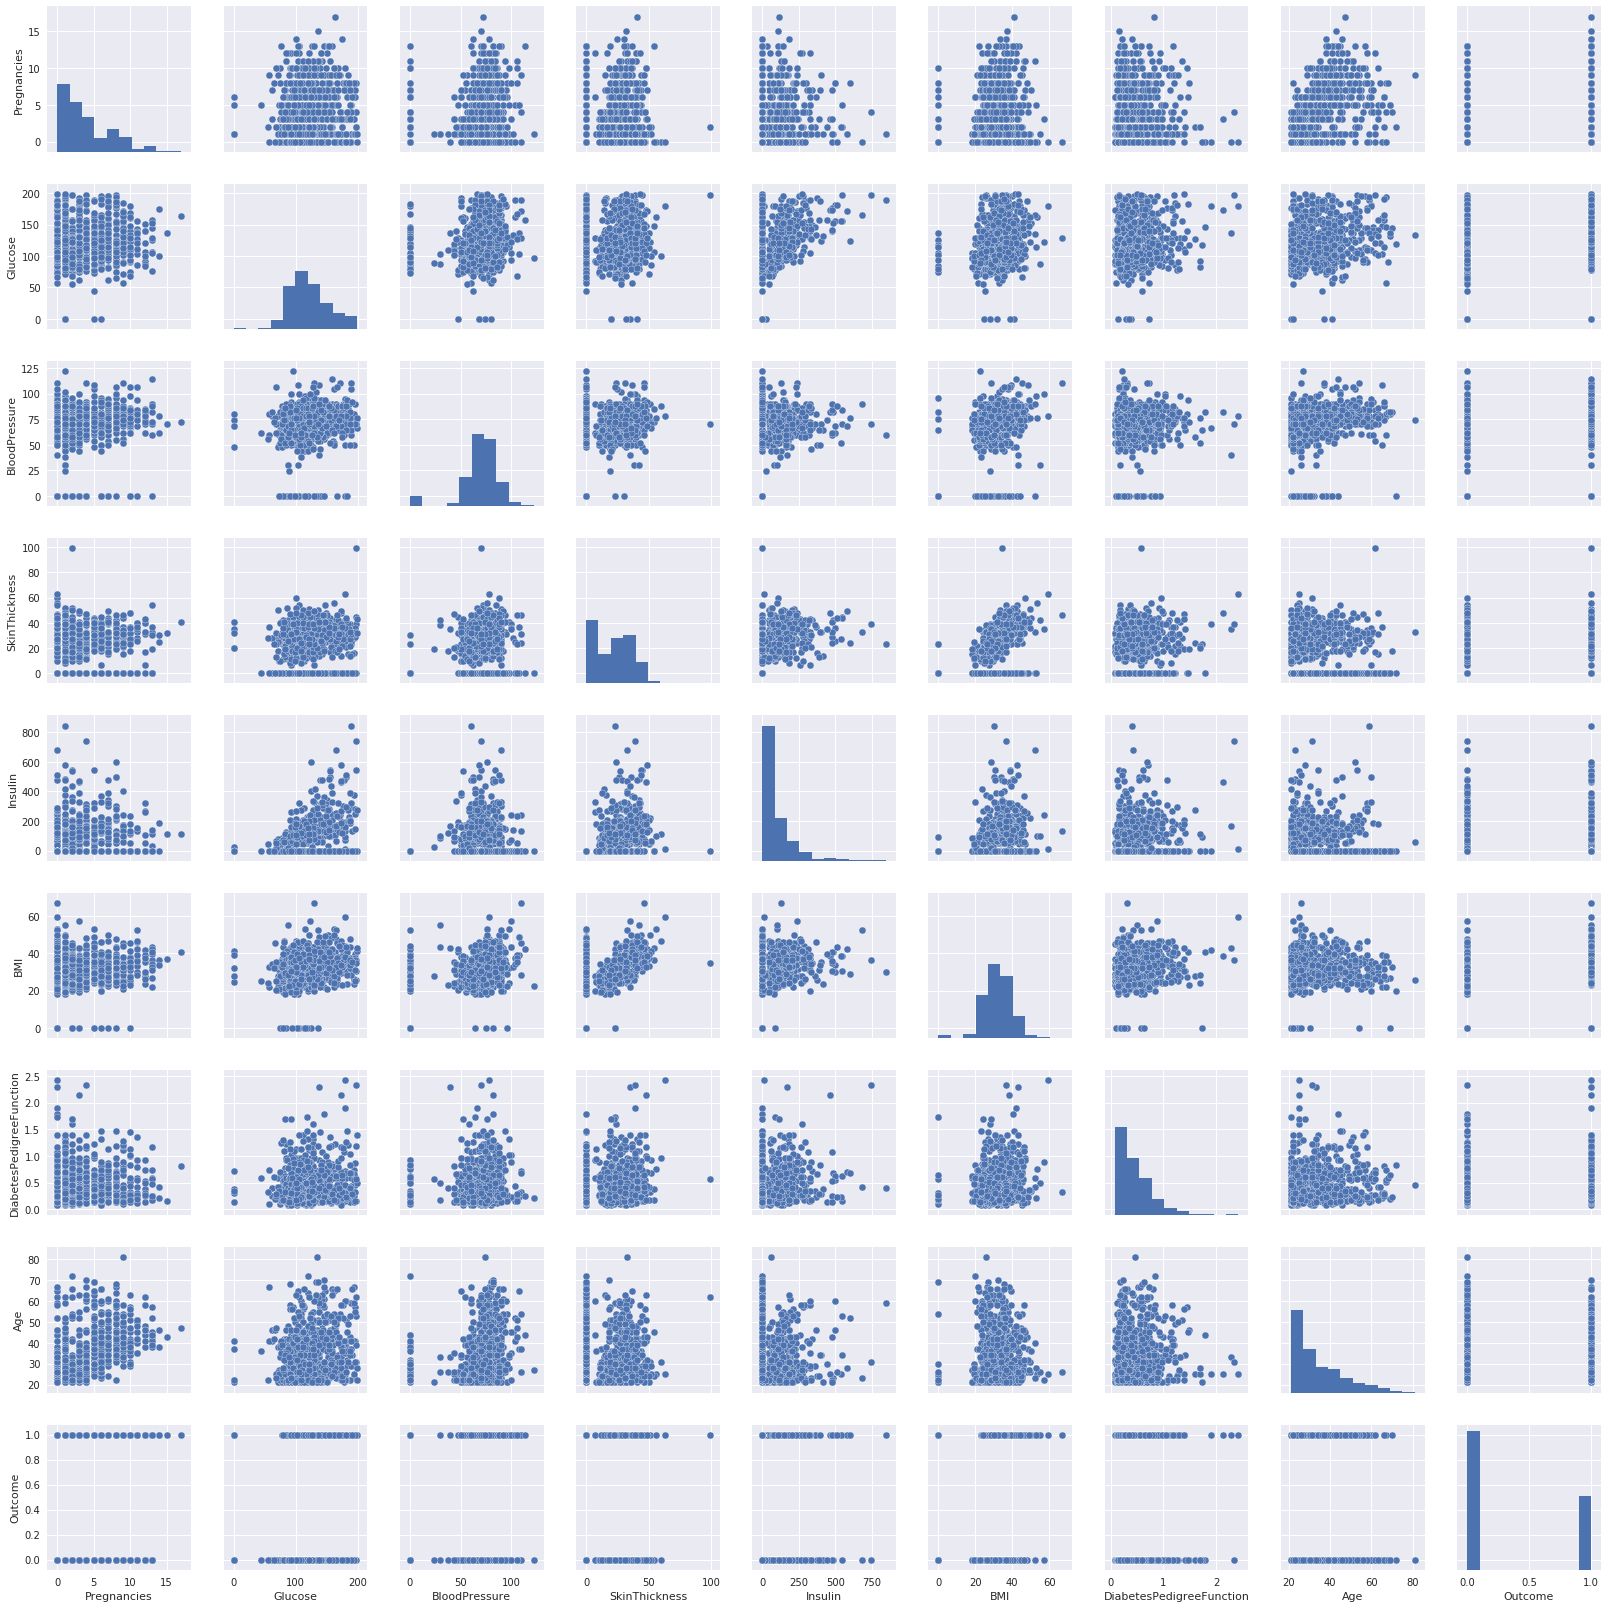

In [16]:
sns.pairplot(df)

* Some correlation between insuline and glucose
* Some age and DiabetesPedigreeFunction
* Almost a normal distribution between Insulin and BMI
* Positive correlation between SkinThickness and BMI
* Surprisingly there is no obvious correlation between BloodPressure and Age

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/ouzoh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


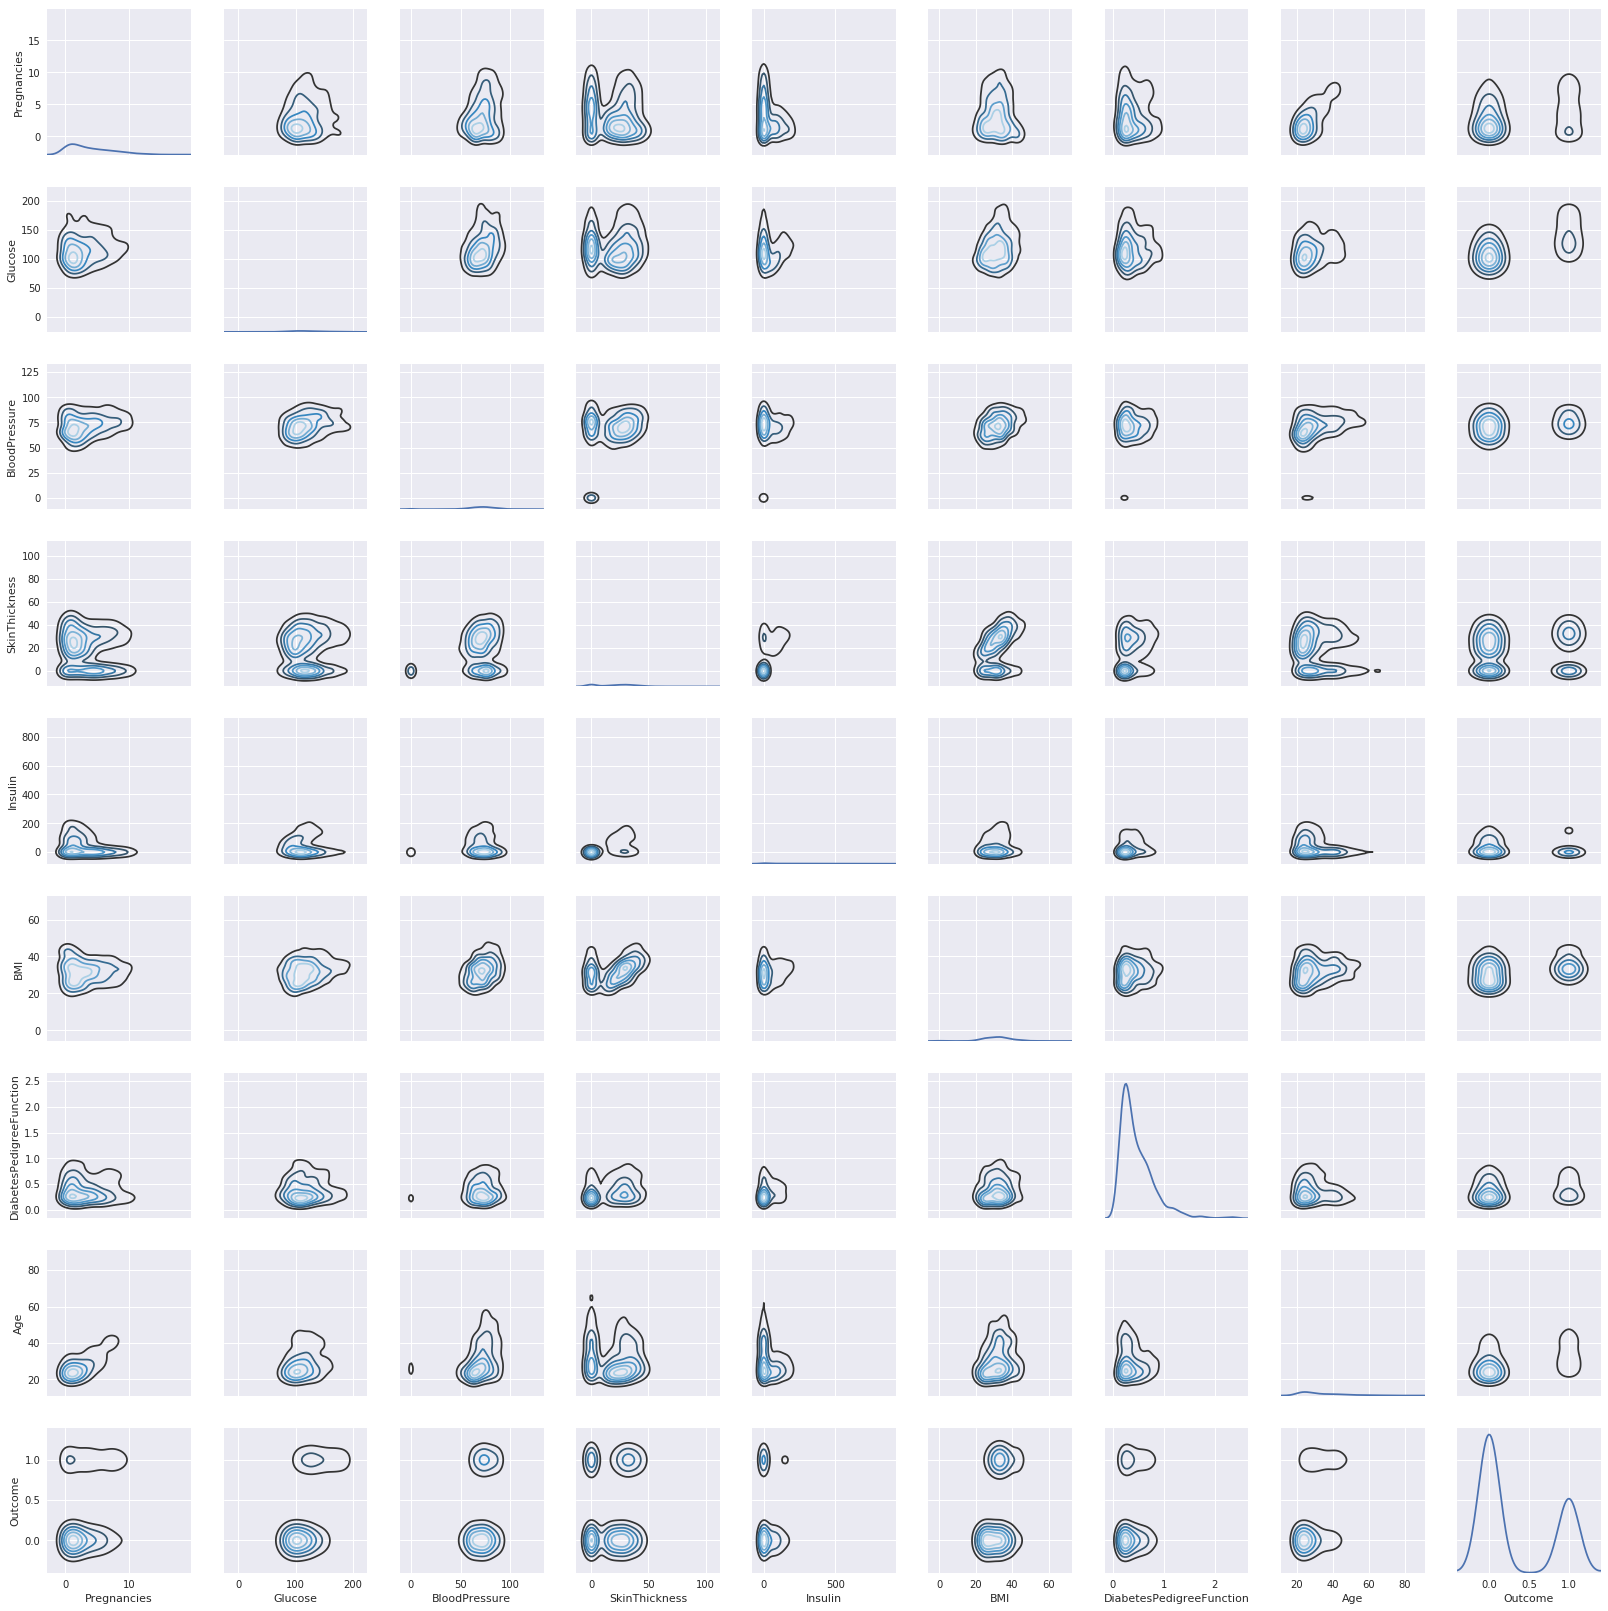

In [17]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

In [18]:
dataset = loadtxt("diabetes.csv", delimiter=",", skiprows=1)

In [19]:
dataset[0:1, :]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ]])

In [20]:
X = dataset[:, :8]
Y = dataset[:, -1] # last column

In [21]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [22]:
Y[0:2]

array([1., 0.])

In [23]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Train the XGBoost Model


In [24]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Make Predictions with XGBoost Model

In [26]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/home/ouzoh/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [27]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%
